In [92]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools
import matplotlib as mpl

In [2]:
sum_2023 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

sum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [246]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
# tmask = tmask.rename({'z' : 'depth', 'y': 'gridY', 'x': 'gridX'})

In [247]:
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})

In [40]:
river_keys = list(sum_2019_mon.keys())

In [196]:
pal_IBM7 = ['#1F5AF5', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#8A190D', '#97C042']
pal_IBM11 = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#8A190D', '#711C32', '#97C042', '#8F4691', '#959F06', '#314527']

pal_CBF7 = ['#005AB5', '#DC3220', '#2C3458', '#A507BB', '#E69E42', '#6A8A2F', '#5A2050']

rainbow_bright = ['#D20000', '#FF7C00', '#FFB600', '#6DCA13', '#44C3D0', '#283BD0', '#B62AD4']
# rainbow_muted = ['#7D0404', '#AB5503', '#CC9100', '#396B09', '#277780', '#151E67', '#561265']
rainbow_muted = ['#7D0404', '#AB5503', '#396B09', '#277780', '#151E67', '#561265']

# rainbow5_bright = ['#921313', '#E8AC22', '#478431', '#365AA2', '#9258B8']
# rainbow5_muted = ['#851111', '#BD601B', '#98982A', '#3F6F6A', '#6459AD']

In [202]:
# colors_list = ['#8b4513', '#008000', '#4682b4', '#4b0082', '#ff0000', '#f2be00', '#00ff00', '#00ffff', '#0000ff', '#918504', '#ff1493', '#2f4f4f', '#2f4f4f']
# lines_list = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', (5, (10, 3)), 'dotted']
# lines_list = [(0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1))]
markers_list = ['o', 's', '^', 'D', 'v', 'p', 'h', 'x', '*', '+', '|', '_', 'd']

year_markers = ['o', 's', '^', 'D', 'x']
year_lines = ['-', (0, (1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1))]

# jet_list = mpl.colormaps['jet'](np.linspace(0, 1, 11))
# black_rgb = np.array([[0, 0, 0, 1]])
# colors_list2 = np.concatenate([jet_list, black_rgb, black_rgb])

# colormap = 'gnuplot'
# colors_list3 = np.concatenate([mpl.colormaps[colormap](np.linspace(0, 1, 7)), mpl.colormaps[colormap](np.linspace(0, 1, 7))])
# lines_list3 = ['-', '-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), ]

# colors_list4 = np.concatenate([plt.cm.tab10(np.arange(6) % 10), plt.cm.tab10(np.arange(7) % 10)])
# lines_list4 = ['-', '-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1))]

# colors_list5 = pal_IBM7[:-1] + pal_IBM7
# lines_list5 = ['-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), '-']

# colors_list6 = pal_CBF7[:-1] + pal_CBF7
# lines_list6 = ['-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), '-']

# # colors_list7 = ['#fee327', '#fdca54', '#f6a570', '#f1969b', '#f08ab1', '#c78dbd', '#927db6', '#5da0d7', '#00b3e1', '#50bcbf', '#65bda5', '#87bf54', '#000000']
# colors_list7 = ['#fee327', '#fdca54', '#f6a570', '#f1969b', '#f08ab1', '#c78dbd', '#927db6', '#5da0d7', '#00b3e1', '#50bcbf', '#65bda5', '#87bf54', '#000000']
# lines_list7 = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

colors_list8 = rainbow_bright + rainbow_muted
lines_list8 = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

In [150]:
plt.cm.tab10(np.arange(7) % 10)

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ]])

In [4]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [5]:
def make_1d(ds, reg_list):
    all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
        all_1d = all_1d + next

    return all_1d

In [6]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

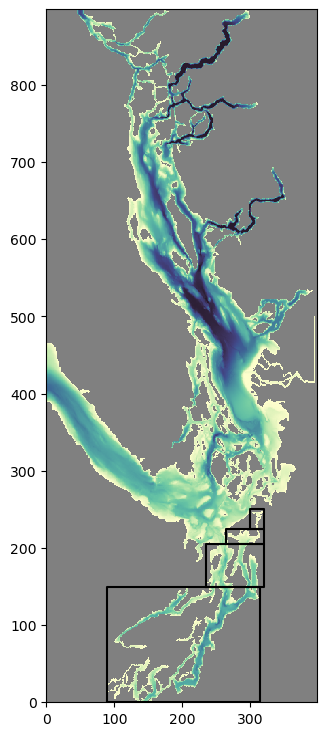

In [7]:
## my boxes
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
PS_main = [0, 150, 90, 315]
plot_box(ax, PS_main, 'k')
PS_AIWB = [150, 205, 235, 320]
plot_box(ax, PS_AIWB, 'k')
PS_WB = [205, 225, 265, 320]
plot_box(ax, PS_WB, 'k')
PS_DP = [225, 250, 300, 320]
plot_box(ax, PS_DP, 'k')

PS_all = [PS_main, PS_AIWB, PS_WB, PS_DP]

## Monthly

In [8]:
dim1_2019_mon = make_1d(sum_2019_mon, PS_all)
dim1_2020_mon = make_1d(sum_2020_mon, PS_all)
dim1_2021_mon = make_1d(sum_2021_mon, PS_all)
dim1_2022_mon = make_1d(sum_2022_mon, PS_all)
dim1_2023_mon = make_1d(sum_2023_mon, PS_all)

In [9]:
dim1_all_mon = xr.concat([dim1_2019_mon, dim1_2020_mon, dim1_2021_mon, dim1_2022_mon, dim1_2023_mon], dim='time')

In [10]:
totals_2019_mon = dim1_2019_mon.to_array().sum(dim="variable")
totals_2020_mon = dim1_2020_mon.to_array().sum(dim="variable")
totals_2021_mon = dim1_2021_mon.to_array().sum(dim="variable")
totals_2022_mon = dim1_2022_mon.to_array().sum(dim="variable")
totals_2023_mon = dim1_2023_mon.to_array().sum(dim="variable")
totals_all_mon = dim1_all_mon.to_array().sum(dim="variable")

In [11]:
prop_2019_mon = dim1_2019_mon/totals_2019_mon
prop_2020_mon = dim1_2020_mon/totals_2020_mon
prop_2021_mon = dim1_2021_mon/totals_2021_mon
prop_2022_mon = dim1_2022_mon/totals_2022_mon
prop_2023_mon = dim1_2023_mon/totals_2023_mon
prop_all_mon = dim1_all_mon/totals_all_mon

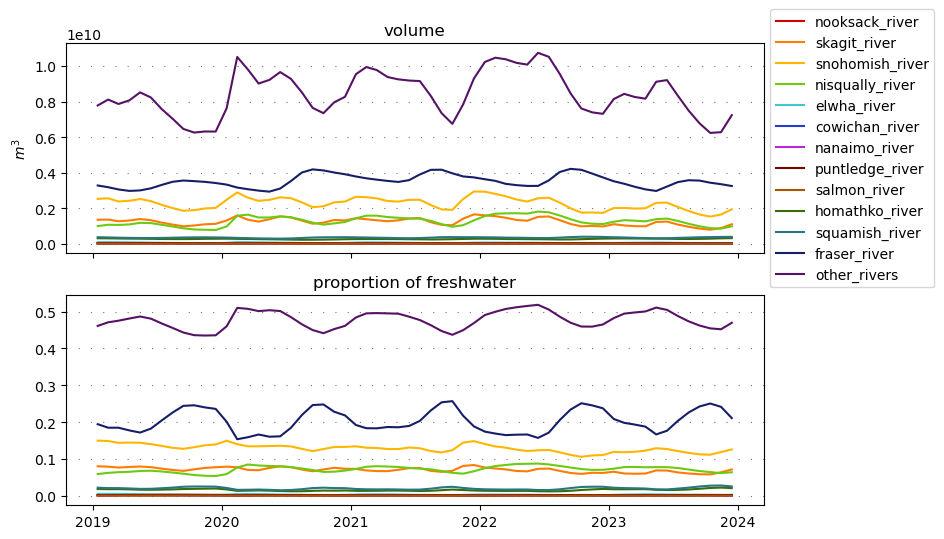

In [225]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

i = 0
for key in river_keys:
    # ax[0].plot(dim1_all_mon['time'], dim1_all_mon[key], label=key, color=colors_list[i], linestyle=lines_list[i], marker=markers_list[i], ms=2)
    # ax[0].plot(dim1_all_mon['time'], dim1_all_mon[key], label=key, color=colors_list[i], linestyle=custom_styles[i])
    # ax[0].plot(dim1_all_mon['time'], dim1_all_mon[key], label=key, color=colors_list2[i], linestyle=lines_list[i])
    ax[0].plot(dim1_all_mon['time'], dim1_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

    ax[0].set_title('volume')
    ax[0].set_ylabel(r'$m^3$')
    # ax[0].set_facecolor('#8a8a8a')
    ax[1].plot(prop_all_mon['time'], prop_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    # ax[1].set_facecolor('#8a8a8a')
    i += 1

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [226]:
def plot_river_years(riv_key):
    fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
    fig.suptitle(riv_key)

    ax[0].plot(dim1_2019_mon['time'], dim1_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k')
    ax[0].plot(dim1_2019_mon['time'], dim1_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k')
    ax[0].plot(dim1_2019_mon['time'], dim1_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k')
    ax[0].plot(dim1_2019_mon['time'], dim1_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k')
    ax[0].plot(dim1_2019_mon['time'], dim1_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k')
    ax[0].legend()
    ax[0].set_title('volume')
    ax[0].set_ylabel(r'$m^3$')
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

    ax[1].plot(prop_2019_mon['time'], prop_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k')
    ax[1].plot(prop_2019_mon['time'], prop_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k')
    ax[1].plot(prop_2019_mon['time'], prop_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k')
    ax[1].plot(prop_2019_mon['time'], prop_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k')
    ax[1].plot(prop_2019_mon['time'], prop_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k')
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

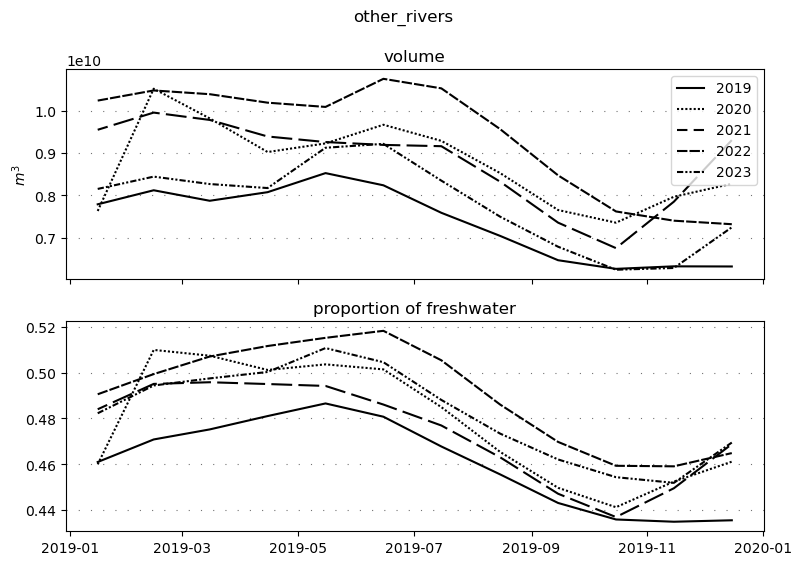

In [227]:
plot_river_years('other_rivers')

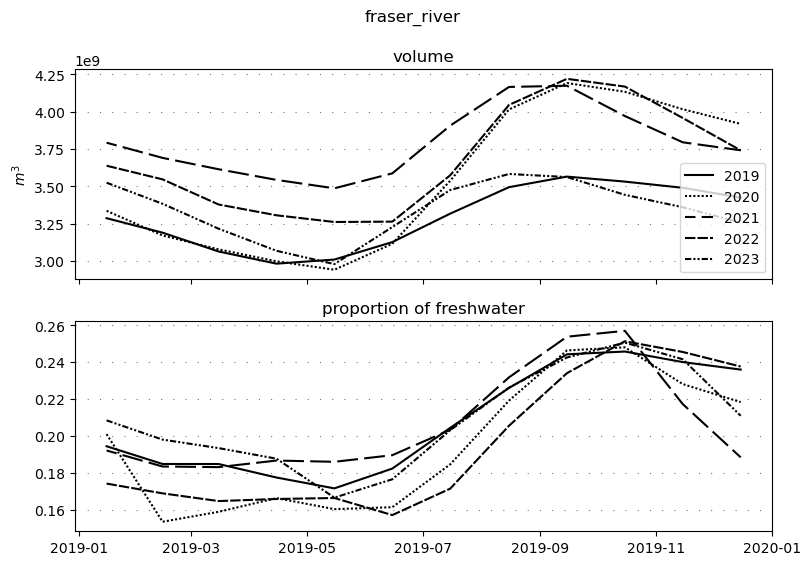

In [228]:
plot_river_years('fraser_river')

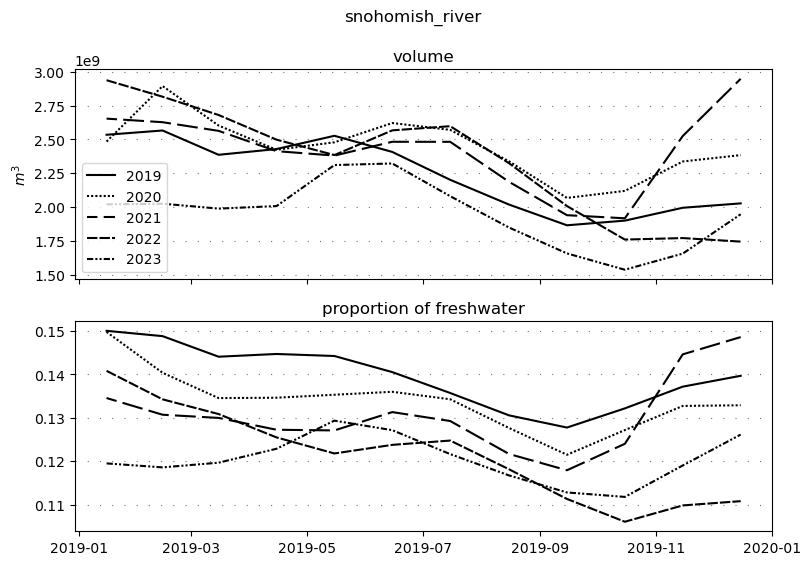

In [229]:
plot_river_years('snohomish_river')

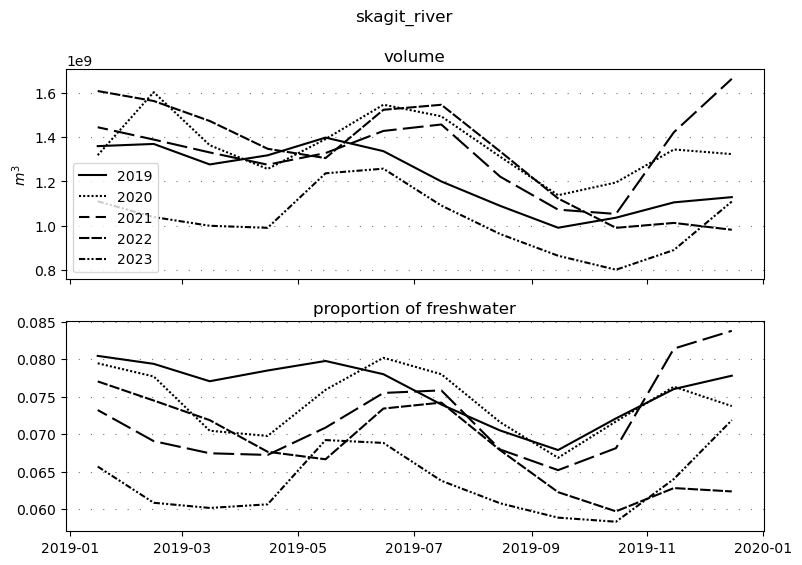

In [230]:
plot_river_years('skagit_river')

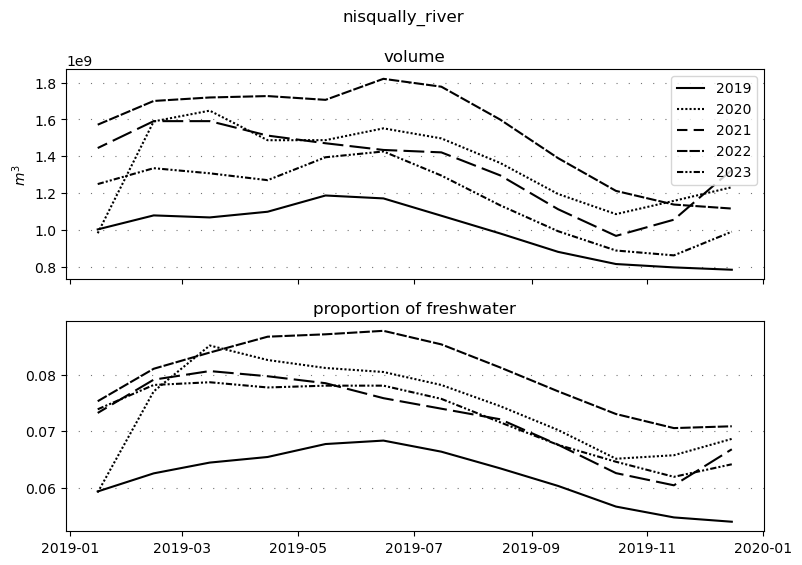

In [231]:
plot_river_years('nisqually_river')

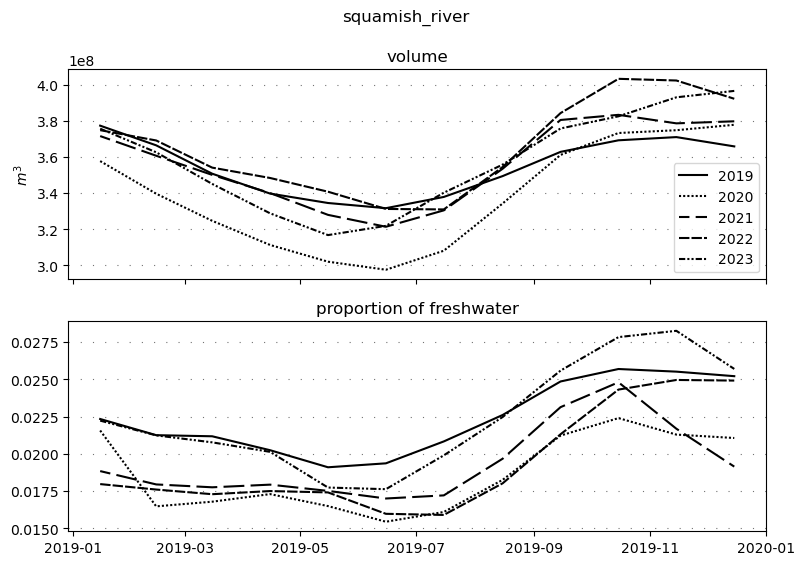

In [232]:
plot_river_years('squamish_river')

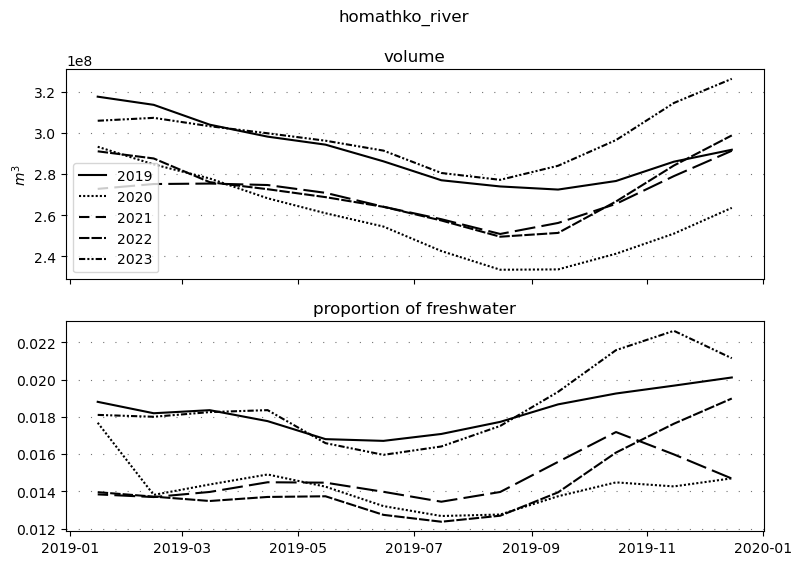

In [233]:
plot_river_years('homathko_river')

## Daily

In [21]:
# dim1_2019 = make_1d(sum_2019, PS_all)

In [22]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# for key in river_keys:
#     dim1_2019[key].plot(label=key)

# ax.legend()